In [1]:
import pandas as pd
import numpy as np

import pylab as plt
%matplotlib inline 

pd.options.mode.chained_assignment = None
data = pd.read_csv("../datasets/titanic.csv")

# Remove records that contains NaN values
data = data.dropna()

# Print the dataset columns (the meaning of each column 
# is in the slides)
print("Titanic Columns\n%s " % list(data.columns))


Titanic Columns
['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'] 


In [2]:
# Get the first few rows of the dataset
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S


In [3]:
# Compute the Max, Mean, Median, Min, Percentiles, and Standard deviation
# for Age
print("Max Age: %.3f" % data["Age"].max())
print("Mean Age: %.3f" % data["Age"].mean())
print("Median Age: %.3f" % data["Age"].median())
print("Age Standard Deviation: %.3f" % data["Age"].std())
print("Min Age: %.3f" % data["Age"].min())
print("25th Percentile for Age: %s" % 
      np.percentile(data["Age"], [25]))
print("75th Percentiles for Age: %s" % 
      np.percentile(data["Age"], [50]))


# Normalize all ages and assign it to a new column called "normalized"
data['normalized'] = data.apply(lambda x: x["Age"]/100., axis=1)

# Get the mean normalized age by grouping w.r.t Sex
print("\n\n%s" % data.groupby("Sex")["normalized"].mean())


Max Age: 80.000
Mean Age: 35.674
Median Age: 36.000
Age Standard Deviation: 15.644
Min Age: 0.920
25th Percentile for Age: [ 24.]
75th Percentiles for Age: [ 36.]


Sex
female    0.326761
male      0.384518
Name: normalized, dtype: float64


In [4]:
# Gender based prediction of survival

# Number of males
cond = data["Sex"] == "male"
print("# males %d" % len(data[cond]))

# Number of females
cond = data["Sex"] == "female"
print("# females %d" % len(data[cond]))

# males 95
# females 88


In [5]:
# Percentage of males that survived
cond1 = (data["Sex"] == "male") & (data["Survived"] == 1)
cond2 = (data["Sex"] == "male")
print("Percentage of males that survived: %.3f" % 
      (len(data[cond1]) / float(len(data[cond2]))))

# Percentage of females that survived
cond1 = (data["Sex"] == "female") & (data["Survived"] == 1)
cond2 = (data["Sex"] == "female")

print("Percentage of females that survived: %.3f" % 
      (len(data[cond1]) / float(len(data[cond2]))))

Percentage of males that survived: 0.432
Percentage of females that survived: 0.932


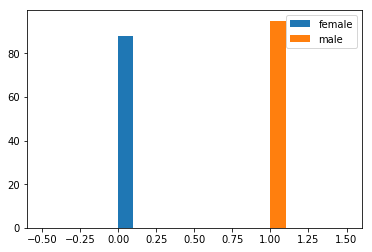

In [6]:
# Let's plot the frequency of females and males as a histogram
cond = (data["Sex"] == "female")
fdata = data[cond]["Sex"].replace("female", 0)

plt.hist(fdata, label="female")

cond = (data["Sex"] == "male")
fdata = data[cond]["Sex"].replace("male", 1)

plt.hist(fdata, label="male")

plt.legend()

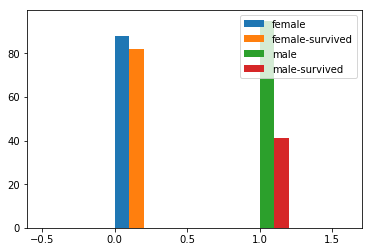

In [7]:
# Let's plot the frequency of males and females as well as the number
# of survivors
condS = (data["Sex"] == "female") & (data["Survived"] == 1)
cond = (data["Sex"] == "female")
fdata = data[cond]["Sex"].replace("female", 0)
fsdata = data[condS]["Sex"].replace("female", 0.1)

plt.hist(fdata, label="female")
plt.hist(fsdata, label="female-survived")

condS = (data["Sex"] == "male") & (data["Survived"] == 1)
cond = (data["Sex"] == "male")
fdata = data[cond]["Sex"].replace("male", 1)
fsdata = data[condS]["Sex"].replace("male", 1.1)

plt.hist(fdata, label="male")
plt.hist(fsdata, label="male-survived")

plt.legend()

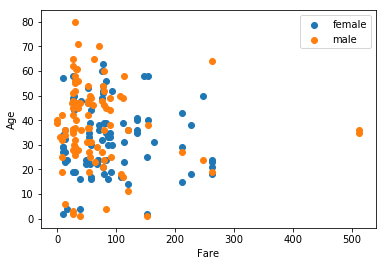

In [8]:
# Plot the relationship between fare and age
data=data.dropna()

cond = (data["Sex"]=="female")
plt.scatter(data[cond]["Fare"], data[cond]["Age"], label="female")

cond = (data["Sex"]=="male")
plt.scatter(data[cond]["Fare"], data[cond]["Age"], label="male")

plt.xlabel("Fare")
plt.ylabel("Age")
plt.legend()

/home/wunderkind/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


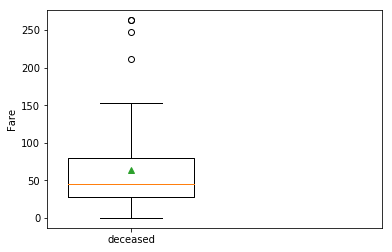

In [9]:
# Plot a boxplot showing the deceased distribution w.r.t Fare
condS = (data["Survived"]==1)
cond = (data["Survived"]==0)

stack = np.array(data[cond]["Fare"]), np.array(data[condS]["Fare"])

plt.boxplot(np.array(data[cond]["Fare"]), positions=[1], labels=["deceased"], showmeans=True)
plt.legend()

plt.ylabel("Fare")
plt.xlim(0.9,1.3)
plt.legend()


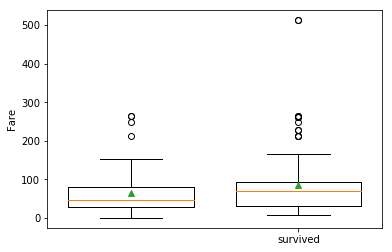

In [10]:
# Plot a boxplot showing the deceased and survivors distribution w.r.t Fare
data=data.dropna()
condS = (data["Survived"]==1)
cond = (data["Survived"]==0)

stack = np.array(data[cond]["Fare"]), np.array(data[condS]["Fare"])

plt.boxplot(np.array(data[cond]["Fare"]), positions=[1], labels=["deceased"], showmeans=True)
plt.legend()

plt.boxplot(np.array(data[condS]["Fare"]), positions=[1.2], labels=["survived"], showmeans=True)


plt.ylabel("Fare")
plt.xlim(0.9,1.3)
plt.legend()

[   0.       29.7      57.       90.      512.3292]


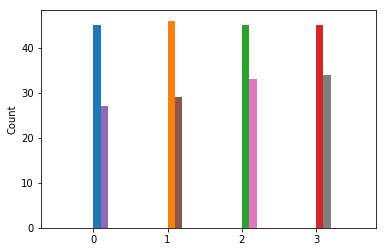

In [11]:
# Divide the Fare data into 5 groups (low fare to high fare)
groups = np.percentile(data["Fare"], [0, 25, 50, 75, 100])

print groups

# Plot histograms based on Fare group and its survivors
labels=[0,1,2,3]
data["Fare_Group"] = pd.cut(data["Fare"], groups, labels=labels)

for i in labels:
    cond = (data["Fare_Group"]==i)
    plt.hist(data[cond]["Fare_Group"], label="Group " + str(i))

    
labels=[0.1,1.1,2.1,3.1]
data["Fare_GroupS"] = pd.cut(data["Fare"], groups, labels=labels)

for i in labels:
    cond = (data["Fare_GroupS"]==i) & (data["Survived"] == 1)
    plt.hist(data[cond]["Fare_GroupS"], label="Survived Group " + str(i))
    
plt.ylabel("Count")



[  0.92  10.    36.    47.5   80.  ]


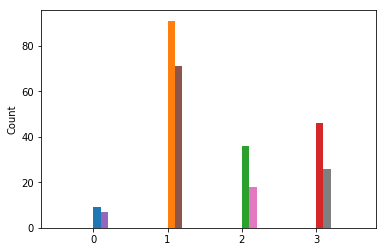

In [12]:
# Economic class

# Divide into 3 groups

data["Age"].dropna(inplace=True)

groups = np.percentile(data["Age"], [0, 25, 50, 75, 100])

groups[1] = 10
print groups

labels=[0,1,2,3]
data["Age_Group"] = pd.cut(data["Age"], groups, labels=labels)



for i in labels:
    cond = (data["Age_Group"]==i)
    plt.hist(data[cond]["Age_Group"], label="Group " + str(i))

    
labels=[0.1,1.1,2.1,3.1]
data["Age_GroupS"] = pd.cut(data["Age"], groups, labels=labels)

for i in labels:
    cond = (data["Age_GroupS"]==i) & (data["Survived"] == 1)
    plt.hist(data[cond]["Age_GroupS"], label="Survived Group " + str(i))
    
plt.ylabel("Count")

In [13]:
# Create a function that computes the percentage of survivors 
# based on age
def count(low, high):
    nch = data[(data["Age"] >= low) & (data["Age"] < high)]["Age"].count()
    nchs = data[(data["Age"] >= low) & (data["Age"] < high) & (data["Survived"] == 1)]["Age"].count()

    return (float(nchs) / nch)

print("Survivors ratio of the passengers between "
      "the age of %d and %d: %.3f" % 
      (0, 10, count(0, 10)))

Survivors ratio of the passengers between the age of 0 and 10: 0.800


In [14]:
# Let's create a model where it predicts "survived" 
# if gender is "female"

def model(data):
    return (data["Sex"]=="female")

# Compute Accuracy: 
# Compare the passengers who surived and the model's prediction
result = data["Survived"] == model(data)
score = result.sum() / float(result.count())
print "Accuracy using the simple model", score

Accuracy using the simple model 0.743169398907


In [15]:
# Let's apply a decision tree to predict survivors
data["Sex_n"] = 0
data["Sex_n"][data["Sex"] == "female"] = 1
data["Sex_n"][data["Sex"] == "male"] = 0

# Decision Tree
from sklearn import tree

X = np.array(data[["Age", "Fare", "Sex_n"]])
y = np.array(data[["Survived"]]).ravel()

clf = tree.DecisionTreeClassifier(max_depth=3)
clf.fit(X, y)
print("Accuracy: %.3f" % clf.score(X, y))

Accuracy: 0.803


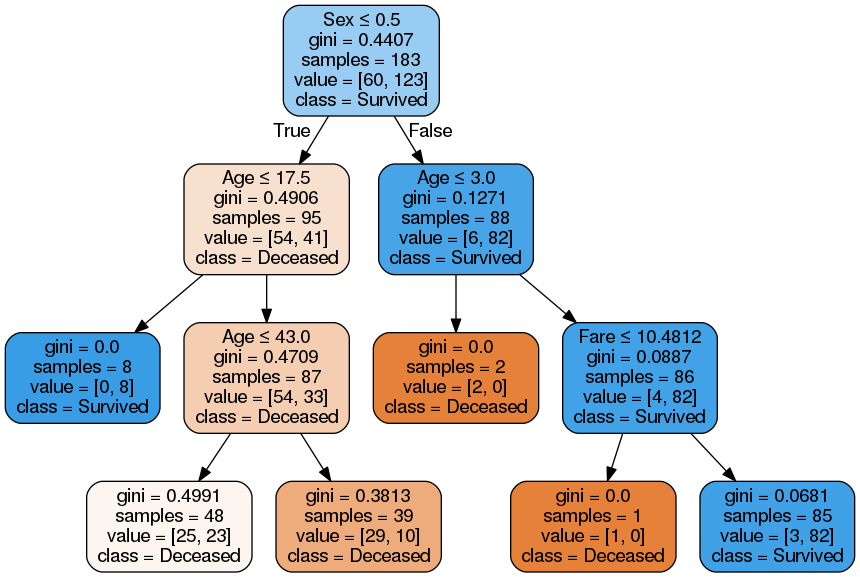

In [16]:
# To run this, please install pydotplus: 
#    Run this command in terminal: 
#             conda install -c anaconda pydot=1.0.28

from IPython.display import Image  
import pydotplus 
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=["Age", "Fare", "Sex"],  
                         class_names=["Deceased", "Survived"],  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())  

## Exercise 1: 
### Try different depths of the decision tree (see code below)


## Exercise 2: 
### Use three sklearn methods and see which gives the highest score (see code below)

In [ ]:
# Exercise 1
# Try different depths of the decision tree and report 
# the accuracy of each depth

X = np.array(data[["Age", "Fare", "Sex_n"]])
y = np.array(data[["Survived"]]).ravel()

# Loop over depths between 1 and 5
for d in range(1, 5):
    # Note that we are changing the max depth
    clf = tree.DecisionTreeClassifier(max_depth=d)
    clf.fit(X, y)
    print("Decision Tree Depth: %d - Accuracy: %.3f" % 
          (d, clf.score(X, y)))

# Exercise 2
# Use three sklearn methods and see which gives the highest score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

print("")
# Train and compute the accuracy for logistic regression
lr = LogisticRegression()
lr.fit(X, y)
print("Logistic Regressions's Accuracy %.3f" % lr.score(X, y))

# Train and compute the accuracy for Random Forests
rf = RandomForestClassifier()
rf.fit(X, y)
print("Random Forests's Accuracy %.3f" % rf.score(X, y))

# Train and compute the accuracy for SVM Classifier
svm = RandomForestClassifier()
svm.fit(X, y)
print("SVM's Accuracy %.3f" % svm.score(X, y))

